In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Exploratory Data Analysis (EDA):
* Perform in-depth EDA to understand the dataset characteristics.
* Calculate summary statistics for numerical columns.
* Analyze categorical data distributions.
* Visualize relationships between features and the target variable (churn).
* Identify potential correlations and patterns.

In [3]:
df = pd.read_csv('synthetic_customer_data.csv')
df.head()

,CustomerID,Age,Gender,ContractType,MonthlyCharges,TotalCharges,TechSupport,InternetService,Tenure,PaperlessBilling,PaymentMethod,Churn,AverageMonthlyCharges,CustomerLifetimeValue
0,1,46,Male,Two year,82.027209,2830.265695,No,Fiber optic,35,Yes,Electronic check,Yes,80.864734,2870.952299
1,2,37,Male,Two year,76.811055,1782.147403,No,DSL,24,No,Bank transfer,Yes,74.256142,1843.465309
2,3,32,Female,Two year,87.253875,3076.542362,Yes,Fiber optic,36,Yes,Bank transfer,No,85.459510,3141.139488
3,4,48,Female,One year,97.906155,5252.119320,No,No,53,Yes,Credit card,Yes,99.096591,5189.026218
4,5,39,Male,Two year,94.229553,2400.922074,Yes,No,26,Yes,Electronic check,Yes,92.343157,2449.968373


In [5]:
df.describe()

,CustomerID,Age,MonthlyCharges,TotalCharges,Tenure,AverageMonthlyCharges,CustomerLifetimeValue
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,2500.500000,39.662200,70.353574,2557.895845,36.558800,70.199117,2551.537364
std,1443.520003,9.889917,29.861069,1880.580746,20.565056,29.506074,1852.726884
min,1.000000,18.000000,20.000000,20.000000,1.000000,5.000000,20.000000
25%,1250.750000,33.000000,49.539857,1046.982539,19.000000,49.114459,1040.000000
50%,2500.500000,40.000000,69.495575,2190.256614,36.000000,69.332598,2197.913996
75%,3750.250000,46.000000,89.316506,3691.994795,55.000000,89.523350,3688.129847
max,5000.000000,75.000000,547.342540,22957.467131,72.000000,227.540528,10800.000000


/var/folders/k4/xdmyf71j29v6ddmj8l6b5lf80000gn/T/ipykernel_21119/2386532787.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/var/folders/k4/xdmyf71j29v6ddmj8l6b5lf80000gn/T/ipykernel_21119/2386532787.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/var/folders/k4/xdmyf71j29v6ddmj8l6b5lf80000gn/T/ipykernel_21119/2386532787.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=col, palette='Set2')
/var/folders/k4/xdmyf71j29v6ddmj8l6b5lf80000gn/T/ipykernel_21

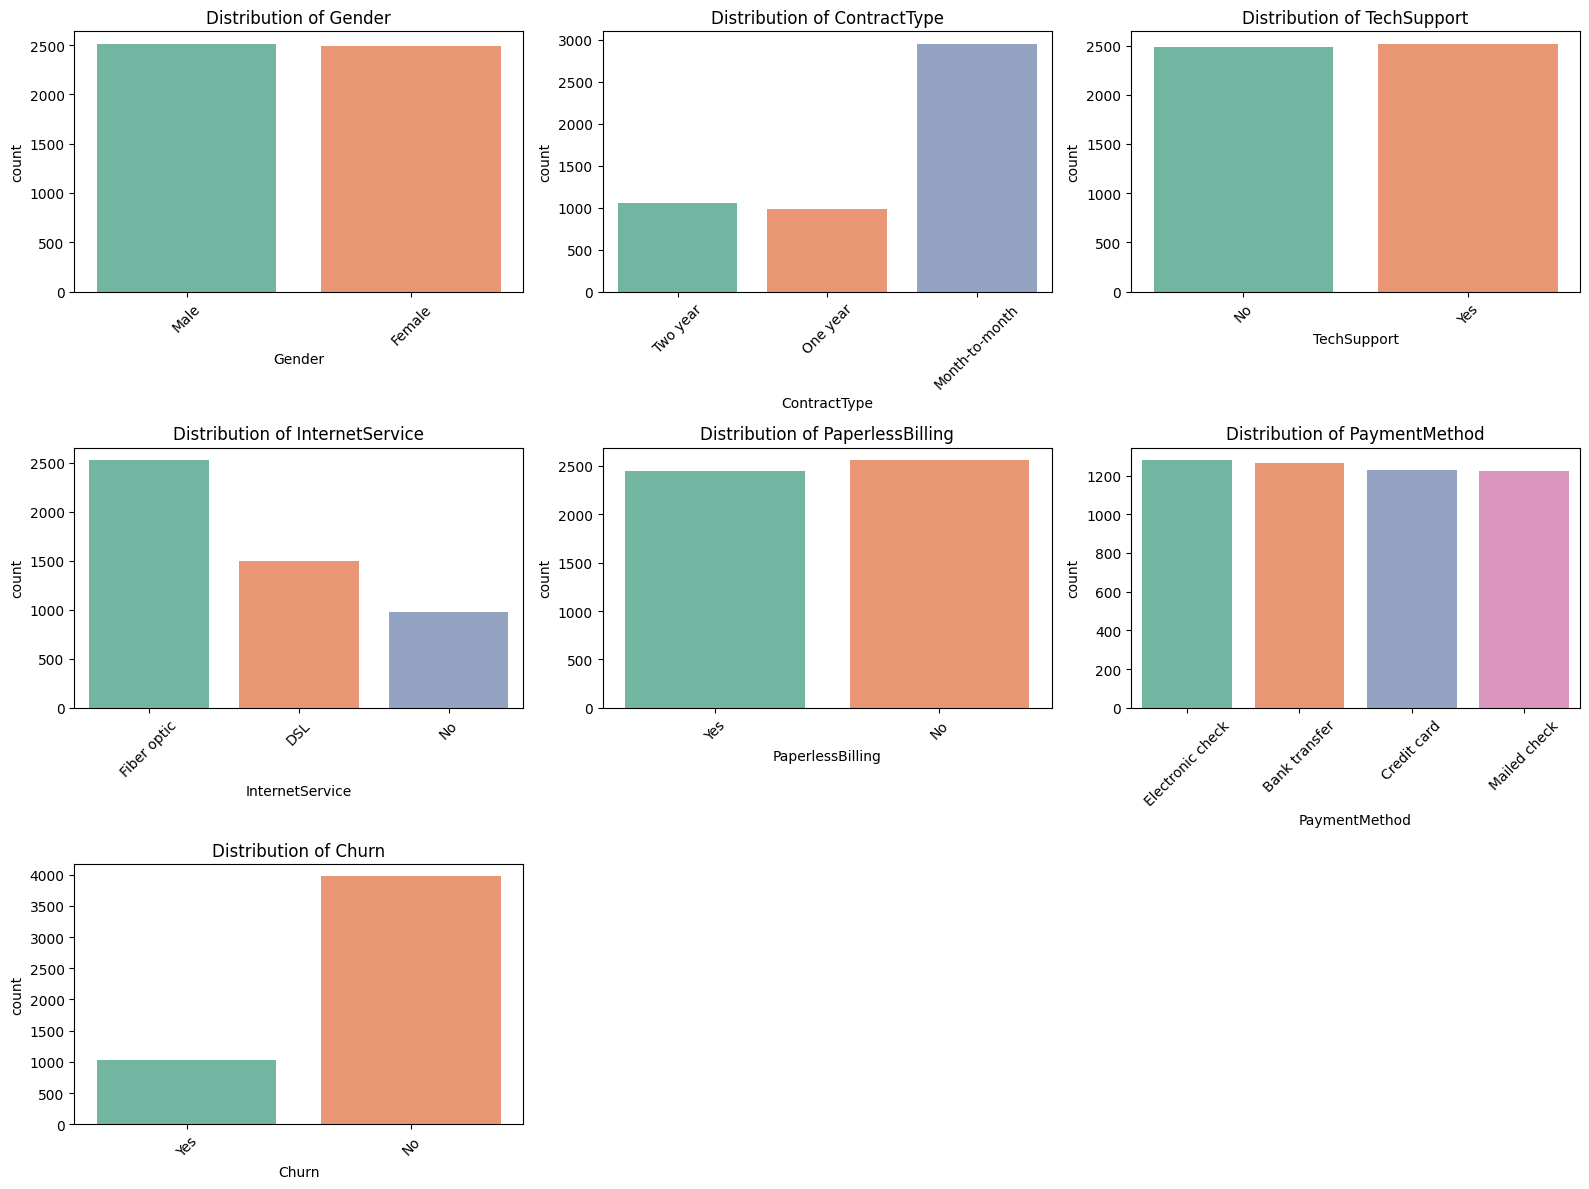

In [12]:
def plot_categorical_distributions(df, columns):
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sns.countplot(data=df, x=col, palette='Set2')
        plt.title(f'Distribution of {col}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

categorical_columns = ['Gender', 'ContractType', 'TechSupport', 'InternetService', 'PaperlessBilling', 'PaymentMethod', 'Churn']

plot_categorical_distributions(df, categorical_columns)


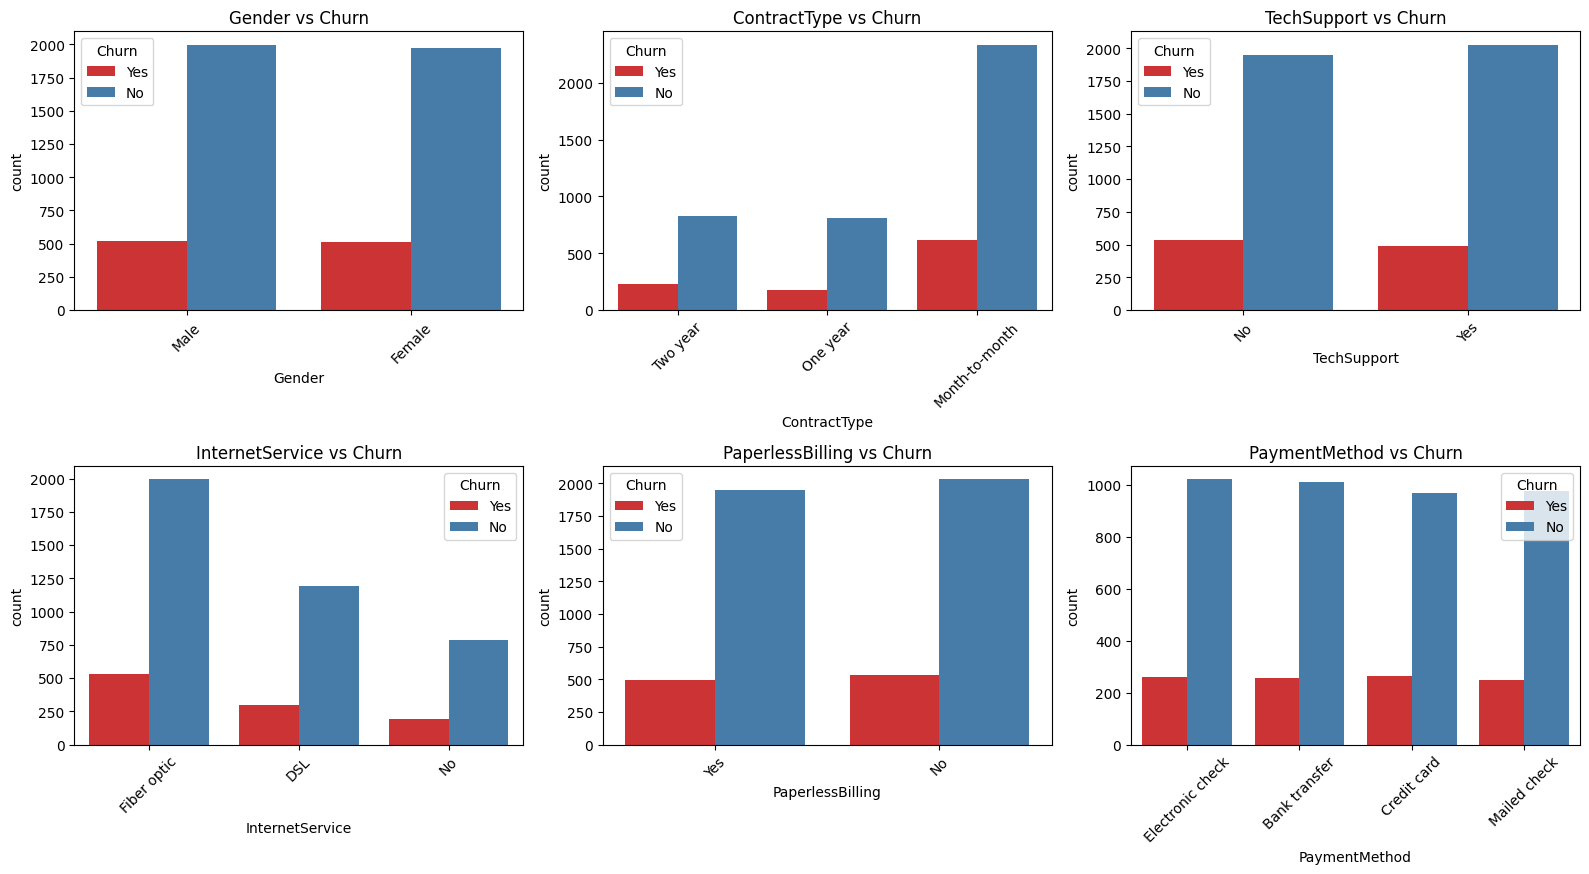

In [15]:
def plot_churn_relationships(df, columns, target):
    plt.figure(figsize=(16, 12))
    for i, col in enumerate(columns, 1):
        plt.subplot(3, 3, i)
        sns.countplot(data=df, x=col, hue=target, palette='Set1')
        plt.title(f'{col} vs {target}')
        plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

plot_churn_relationships(df, categorical_columns[:-1], 'Churn')


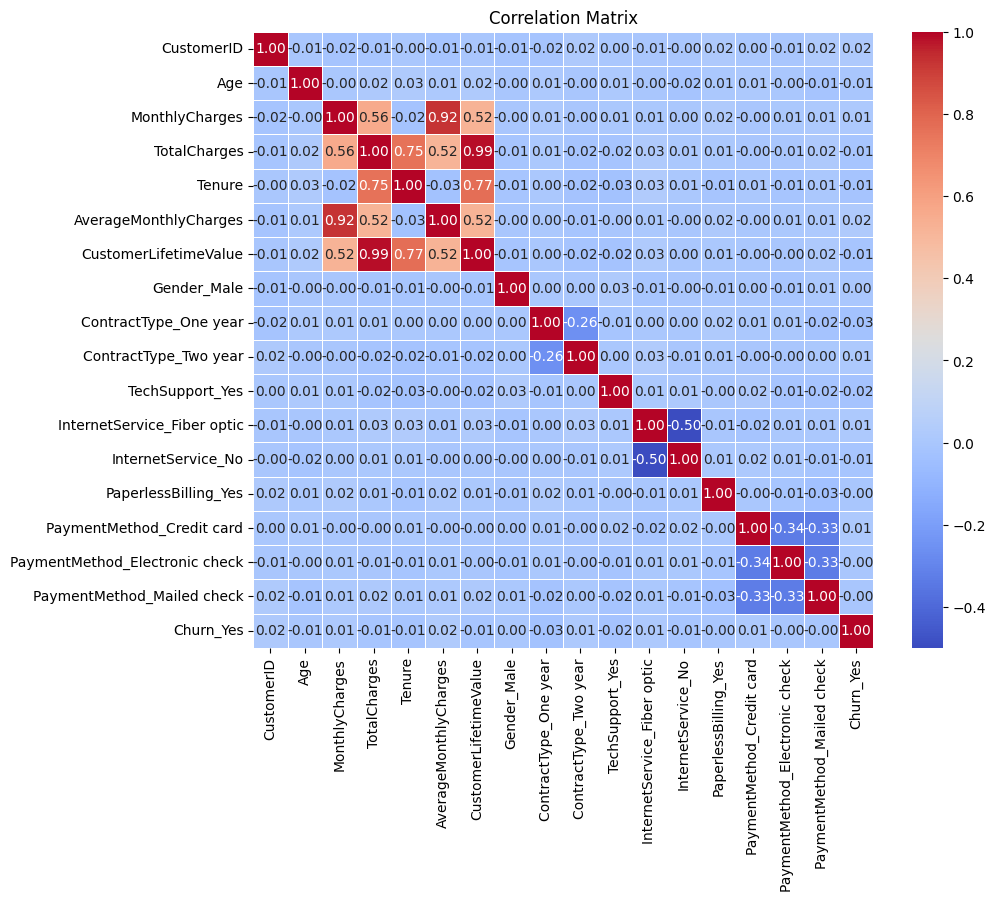

Correlation with Churn:
Churn_Yes                         1.000000
AverageMonthlyCharges             0.022600
CustomerID                        0.020931
InternetService_Fiber optic       0.014041
ContractType_Two year             0.013983
MonthlyCharges                    0.013263
PaymentMethod_Credit card         0.011331
Gender_Male                       0.000624
PaymentMethod_Mailed check       -0.003600
PaymentMethod_Electronic check   -0.003860
PaperlessBilling_Yes             -0.004366
Age                              -0.005549
InternetService_No               -0.007616
CustomerLifetimeValue            -0.009993
TotalCharges                     -0.010600
Tenure                           -0.014956
TechSupport_Yes                  -0.024172
ContractType_One year            -0.029532
Name: Churn_Yes, dtype: float64


In [22]:
# One-hot encode categorical variables
df_encoded = pd.get_dummies(df, drop_first=True)

# Compute the correlation matrix
correlation_matrix = df_encoded.corr()

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Focus on correlation with Churn
print("Correlation with Churn:")
print(correlation_matrix['Churn_Yes'].sort_values(ascending=False))


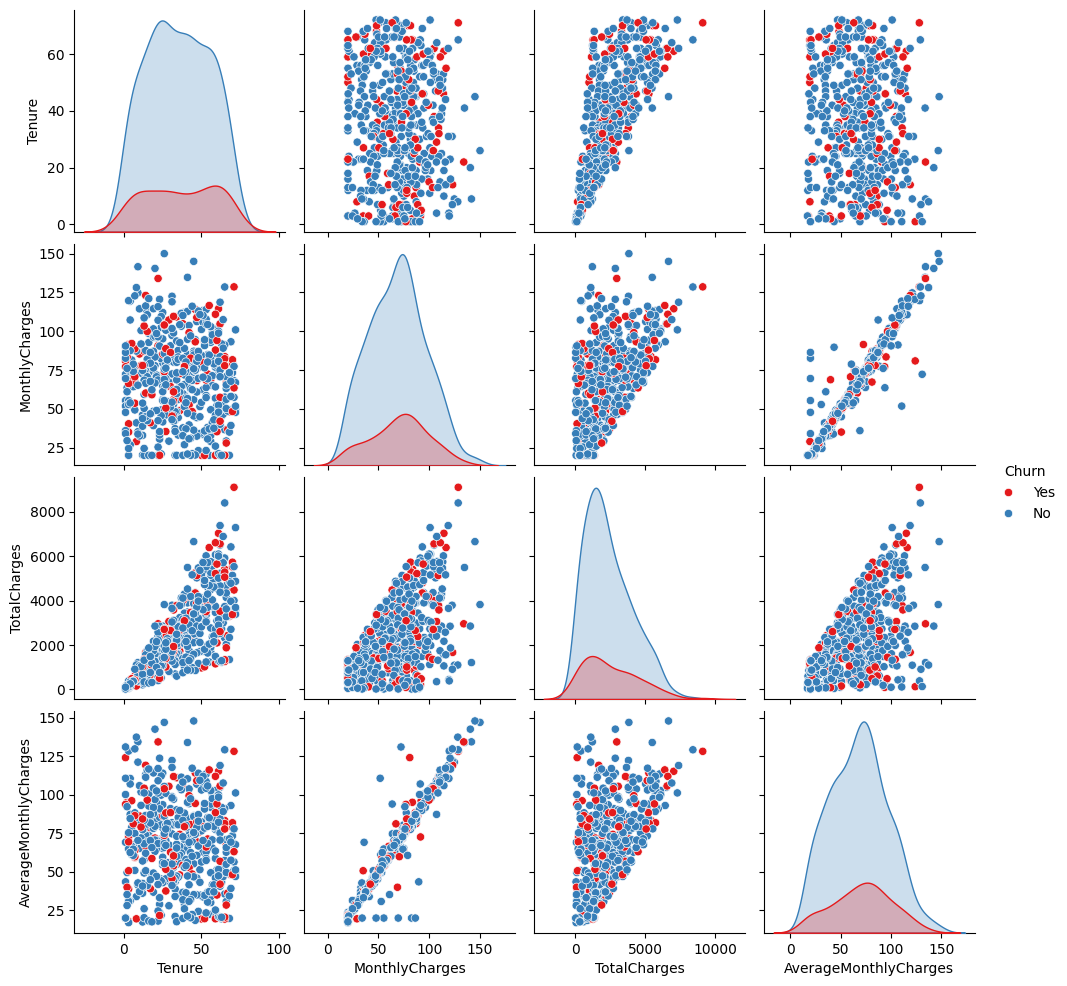

In [20]:
sample_data = df.sample(500, random_state=42)

sns.pairplot(sample_data[['Tenure', 'MonthlyCharges', 'TotalCharges', 'AverageMonthlyCharges', 'Churn']],
             hue='Churn', palette='Set1')
plt.show()
